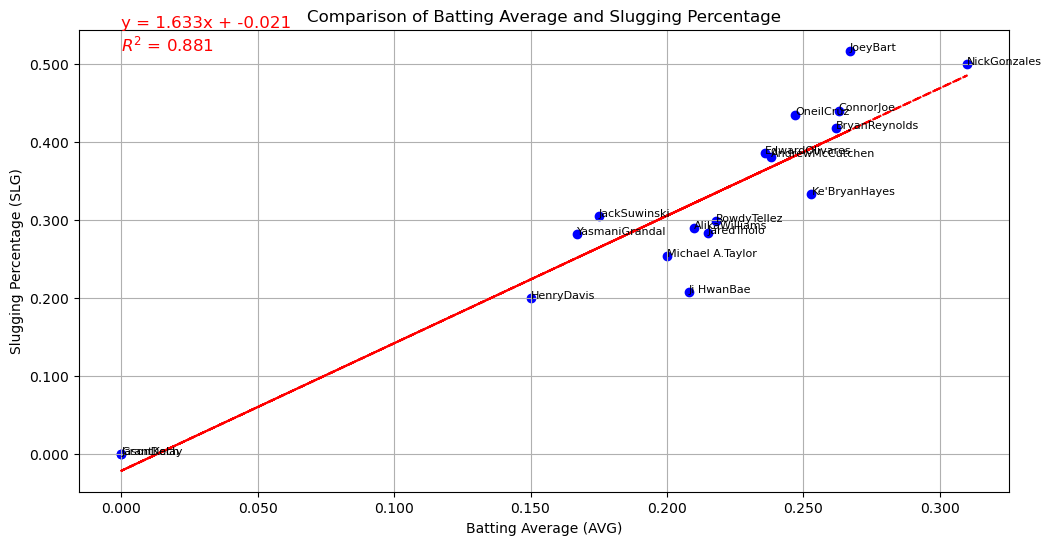

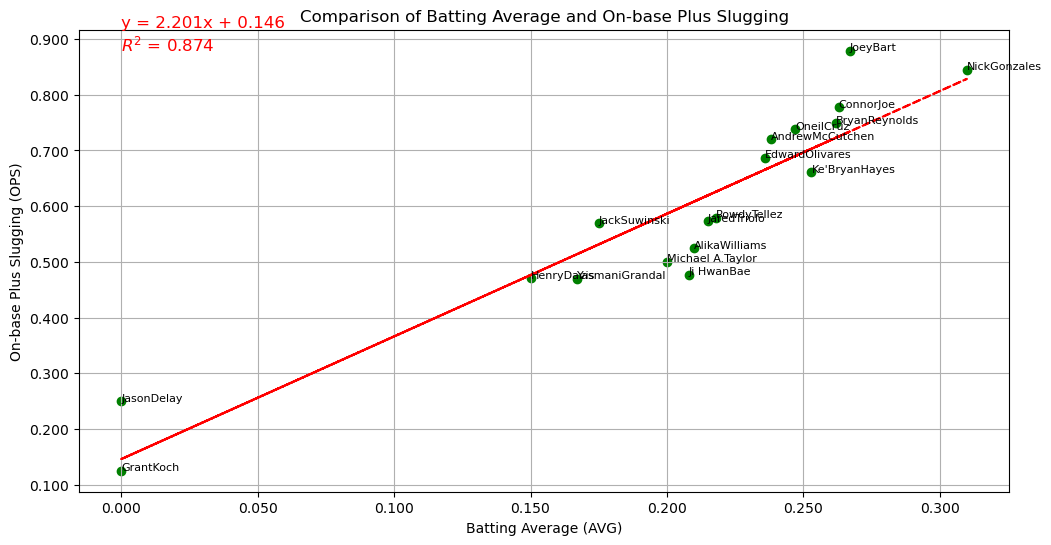

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = '6.9.2024.csv'
data = pd.read_csv(file_path)

# Ensure the PLAYER column is used as labels
data['PLAYER'] = data['PLAYER'].astype(str)

# Function to add trendline and annotations for equation and R^2
def add_trendline_and_annotations(x, y, xlabel, ylabel, title, color):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, c=color, label=ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Add data labels
    for i, player in enumerate(data['PLAYER']):
        plt.text(x[i], y[i], player, fontsize=8)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    trendline = model.predict(x.values.reshape(-1, 1))
    
    # Plot trendline
    plt.plot(x, trendline, "r--")

    # Calculate R^2
    r_squared = model.score(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

    # Display equation and R^2
    equation = f"y = {model.coef_[0][0]:.3f}x + {model.intercept_[0]:.3f}"
    plt.text(min(x), max(y), f"{equation}\n$R^2$ = {r_squared:.3f}", fontsize=12, color='red')

    # Set axis format
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{val:.3f}'))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{val:.3f}'))
    
    plt.show()

# Scatter plot for AVG vs SLG with trendline, equation, and R^2
add_trendline_and_annotations(data['AVG'], data['SLG'], 'Batting Average (AVG)', 'Slugging Percentage (SLG)', 'Comparison of Batting Average and Slugging Percentage', 'blue')

# Scatter plot for AVG vs OPS with trendline, equation, and R^2
add_trendline_and_annotations(data['AVG'], data['OPS'], 'Batting Average (AVG)', 'On-base Plus Slugging (OPS)', 'Comparison of Batting Average and On-base Plus Slugging', 'green')
